# outlier detecting using percentile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset/placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

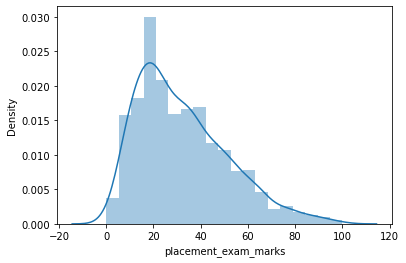

In [4]:
sns.distplot(df['placement_exam_marks'])

In [23]:
ul=df['placement_exam_marks'].quantile(0.99)
ul

87.0

In [24]:
ll=df['placement_exam_marks'].quantile(0.01)
ll

4.0

In [30]:
new_df=df[(df['placement_exam_marks'] < ul) & (df['placement_exam_marks'] > ll )]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [31]:
new_df['placement_exam_marks'].describe()

count    974.000000
mean      31.912731
std       17.886406
min        5.000000
25%       18.000000
50%       28.000000
75%       44.000000
max       86.000000
Name: placement_exam_marks, dtype: float64

In [33]:
ul=new_df['placement_exam_marks'].quantile(0.99)
ul

79.0

In [34]:
ll=new_df['placement_exam_marks'].quantile(0.01)
ll

6.0

C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

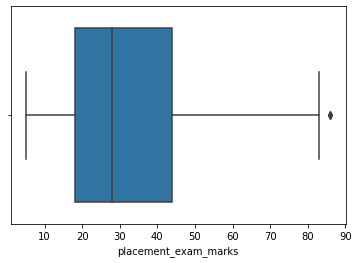

In [35]:
sns.boxplot(new_df['placement_exam_marks'])

In [14]:
new=df.copy()

In [15]:
new

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

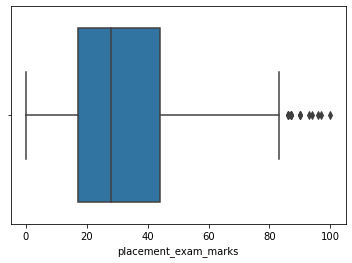

In [16]:
sns.boxplot(new['placement_exam_marks'])

In [37]:
new['placement_exam_marks']=np.where((df['placement_exam_marks'] > ul),
                                       ul,
                                       np.where((df['placement_exam_marks'] < ll),
                                               ll,
                                                df['placement_exam_marks'] ))

C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

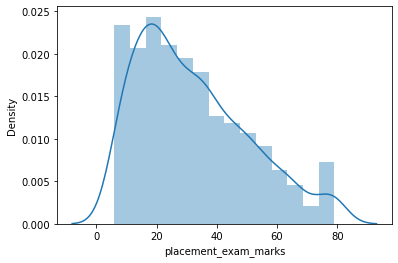

In [38]:
sns.distplot(new['placement_exam_marks'])

C:\Users\CS-L2-PC02\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

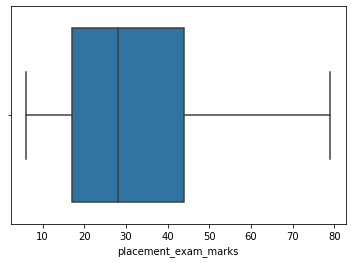

In [39]:
sns.boxplot(new['placement_exam_marks'])